### 1 - Importing the necessary librairies

In [44]:
## Import necessary libraries 

# Ingestion module for loading JSON data 
from ingestion_module import load_json_data
# Ingestion module for handling outliers
from ingestion_module import detect_outliers
# Ingestion module for creating a time series dataframe
from ingestion_module import time_series_df
# Ingestion module for top_revenue by country
from ingestion_module import top_revenue_by_country
# Ingestion module for plot_revenu_violin
from ingestion_module import plot_revenu_violin
# Ingestion module for normality_check
from ingestion_module import normality_check
# Ingestion module for create_anova_df
from ingestion_module import create_anova_df
# Ingestion module for levenes_test
from ingestion_module import levenes_test
# Ingestion module for welchs_anova
from ingestion_module import welchs_anova
# Ingestion module for tukeys_hsd_test
from ingestion_module import Games_Howell_test
# Ingestion module for correlation_matrix_and_stat_significance
from ingestion_module import correlation_matrix_and_stat_significance
# Ingestion module for pairplot
from ingestion_module import pairplot
# Ingestion module for plot_moving_average
from ingestion_module import plot_moving_average
# Ingestion module for plot_time_series_decomposition
from ingestion_module import plot_time_series_decomposition
# Ingestion module for acf_and_pacf_plots
from ingestion_module import acf_and_pacf_plots

# Pandas for data manipulation and analysis
import pandas as pd
# NumPy for numerical operations and array handling
import numpy as np

# SciPy for statistical functions and tests
import scipy.stats as stats  # General statistical functions
from scipy.stats import f  # f-distribution functions
from scipy.stats import t  # t-distribution functions
from scipy.stats import shapiro  # Shapiro-Wilk test for normality
from scipy.stats import levene  # Levene’s test for equal variances
from scipy.stats import ttest_ind  # Independent t-test
from scipy.stats import normaltest  # Test for normality
from scipy.stats import probplot  # Probability plot for normality assessment
from scipy.stats import spearmanr  # Spearman rank correlation coefficient
from scipy.stats import pearsonr


# Statsmodels for statistical modeling and time series analysis
import statsmodels.api as sm  # Main Statsmodels API
import statsmodels.stats.multicomp as smc
import prophet
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import STL  # Seasonal-Trend decomposition using LOESS
from statsmodels.tsa.seasonal import seasonal_decompose  # Seasonal decomposition
from statsmodels.tsa.stattools import acf, pacf  # Autocorrelation and partial autocorrelation functions
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test for stationarity
from datetime import datetime

# Scikit-learn for machine learning and model evaluation
from sklearn.model_selection import train_test_split  # Splitting data into training and test sets
from sklearn.linear_model import Ridge  # Ridge regression model
from sklearn.linear_model import RidgeCV  # Ridge regression with cross-validation
from sklearn.metrics import mean_squared_error  # MSE metric for model evaluation
# Isolation Forest for anomaly detection
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# itertools for creating combinations of elements (useful for parameter tuning)
import itertools  

# Seaborn for data visualization with a higher-level interface
import seaborn as sns
# Matplotlib for basic plotting and visualization
import matplotlib.pyplot as plt
# Plotly for interactive visualizations
from plotly.subplots import make_subplots  # For creating subplots
import plotly.express as px  # Simplified interface for creating visualizations
import plotly.graph_objects as go  # More complex Plotly visualizations


# Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')


print('\nNecessary librairies imported\n')





Necessary librairies imported



### 2 - Loading the dataframe

In [2]:
## loading the dataframe as loaded_df

loaded_df = load_json_data('cs-train')

print("\nLoading Summary\n{}".format("-"*22))

print("\n... Dataframe loaded as 'loaded_df'\n")

## Information about the data types
print('The columns are:\n',loaded_df.columns.tolist())

# List of numerical columns
numerical_cols = loaded_df.select_dtypes(include='number').columns.tolist()
print(f'\nThe numerical columns in loaded_df are : {" and ".join(numerical_cols)}\n')
# List of categorycal columns
categorycal_cols = loaded_df.select_dtypes(include='category').columns.tolist()
print(f'\nThe categorycal columns in loaded_df are : {", ".join(categorycal_cols)}\n')

## Rows count
print(f'\nloaded_df contains initialy {len(loaded_df):,.0f} rows\n')



Loading Summary
----------------------

... Dataframe loaded as 'loaded_df'

The columns are:
 ['country', 'date', 'invoice_id', 'customer_id', 'stream_id', 'times_viewed', 'price']

The numerical columns in loaded_df are : times_viewed and price


The categorycal columns in loaded_df are : country, invoice_id, customer_id, stream_id


loaded_df contains initialy 815,011 rows



### 3 - Cleaning the dataframe

#### B - Handling Duplicate Rows

In [3]:
## Check for Duplicate rows in loaded_df

duplicate_rows = loaded_df.duplicated(keep="first")
total_duplicates = duplicate_rows.sum()

print(f'\nThere are {total_duplicates:,.0f} duplicate rows\n')



There are 28,844 duplicate rows



In [4]:
# Remove the duplicate rows in loaded_df

print("\nDuplicate rows Summary\n{}".format("-"*22))

size_before_drop_duplicates = len(loaded_df)
loaded_df.drop_duplicates(keep="first", inplace=True )
size_after_drop_duplicates = len(loaded_df)

print(f"\nThe total number of rows before dropping duplicates is {size_before_drop_duplicates:,.0f}")

print(f"\n... Removed {size_before_drop_duplicates-size_after_drop_duplicates:,.0f} duplicate rows in the loaded_df.")

print(f"\nThe total number of rows after dropping duplicates is {size_after_drop_duplicates:,.0f}\n")



Duplicate rows Summary
----------------------

The total number of rows before dropping duplicates is 815,011

... Removed 28,844 duplicate rows in the loaded_df.

The total number of rows after dropping duplicates is 786,167



#### C - Data Integrity and Quality

To maintain the integrity of our data, we cannot have negative or zero values in price and times_viewed, the numerical columns.

Therefore, we will be removing any rows that contain these invalid values.

In [5]:
## Check for data Quality in the numerical columns 

loaded_df_with_price_quality_issues        = loaded_df[ (loaded_df.price<=0) ]
loaded_df_with_times_viewed_quality_issues = loaded_df[ (loaded_df.times_viewed<=0) ]

print(f"\nThere are {len(loaded_df_with_price_quality_issues):,.0f} rows with invalid price data (negative or zero values)\n")
print(f"There are {len(loaded_df_with_times_viewed_quality_issues):,.0f} rows with invalid times_viewed data (negative or zero values)\n")



There are 5,252 rows with invalid price data (negative or zero values)

There are 7,714 rows with invalid times_viewed data (negative or zero values)



In [6]:
# Excluding rows with invalid data

print("\nData quality Summary\n{}".format("-"*26))

size_before_invalid_data = len(loaded_df)
loaded_df_without_invalid_data = loaded_df[ (loaded_df.price>0) & (loaded_df.times_viewed>0) ]
size_after_invalid_data = len(loaded_df_without_invalid_data)


print(f"\nThe total number of rows before excluding invalid data is {size_before_invalid_data:,.0f}.")

print(f"\n... Removed {(size_before_invalid_data - size_after_invalid_data):,.0f} rows with invalid data in the loaded_df.")

print(f"\nThe total number of rows after excluding invalid data is {size_after_invalid_data:,.0f}.\n")




Data quality Summary
--------------------------

The total number of rows before excluding invalid data is 786,167.

... Removed 12,328 rows with invalid data in the loaded_df.

The total number of rows after excluding invalid data is 773,839.



#### D - Handling Outliers 

To ensure the accuracy and reliability of our analysis, identifying outliers is essential as these anomalies can significantly influence our results.

Therefore, by analyzing each numerical column within individual countries, we will be removing any rows that contain outliers.

We will import the detect_outliers function, which identifies outliers in a specified column of the dataframe for each country.

This function applies Z-Score, IQR, and Isolation Forest methods to the selected column within each country group.

In [7]:

## Check for outliers in the numerical columns 

# price outliers
price_outliers = detect_outliers(loaded_df_without_invalid_data, column='price',z_threshold=3, contamination=0.01)
loaded_df_with_price_outliers = loaded_df_without_invalid_data[price_outliers]

# times_viewed outliers
times_viewed_outliers = detect_outliers(loaded_df_without_invalid_data, 'times_viewed',z_threshold=3, contamination=0.01)
loaded_df_with_times_viewed_outliers = loaded_df_without_invalid_data[times_viewed_outliers]

# combined outliers
combined_outliers = price_outliers | times_viewed_outliers
loaded_df_with_combined_outliers = loaded_df_without_invalid_data[combined_outliers]

print(f"\nThere are {len(loaded_df_with_price_outliers):,} rows identified with outlier price data")
print(f"\nThere are {len(loaded_df_with_times_viewed_outliers):,} rows identified with outlier times_viewed data")
print(f"\nOverall, There are {len(loaded_df_with_combined_outliers):,} rows identified outlier data\n")


There are 53,214 rows identified with outlier price data

There are 20,967 rows identified with outlier times_viewed data

Overall, There are 73,951 rows identified outlier data



In [8]:
# Excluding rows with outliers

print("\n Outliers Summary\n{}".format("-"*26))

size_before_handling_outliers = len(loaded_df_without_invalid_data)
loaded_df_without_outliers    = loaded_df_without_invalid_data[~combined_outliers]
size_after_handling_outliers  = len(loaded_df_without_outliers)


print(f"\nThe total number of rows before excluding outliers is {size_before_handling_outliers:,.0f}.")

print(f"\n... Removed {(size_before_handling_outliers-size_after_handling_outliers):,.0f} rows with outliers in the loaded_df_without_invalid_data.")

print(f"\nThe total number of rows after excluding outliers is {size_after_handling_outliers:,.0f}.\n")



 Outliers Summary
--------------------------

The total number of rows before excluding outliers is 773,839.

... Removed 73,951 rows with outliers in the loaded_df_without_invalid_data.

The total number of rows after excluding outliers is 699,888.



# B - Data Analysis and Hypothesis Testing 


In this section, we conduct a comprehensive analysis on the revenue data to uncover significant patterns or relationships. Specifically, we will examine whether the monthly revenue from the top ten countries shows notable differences, explore the relationships between various factors influencing revenue generation, and investigate seasonal trends in revenue. 

This analysis will help validate assumptions and draw meaningful conclusions about revenue dynamics and factors that may influence them.



In [9]:
loaded_df = loaded_df_without_outliers

Let's create a bar chart to display the top 10 countries ranked by revenue generation. To ensure clarity, the x-axis will utilize a logarithmic scale to represent revenue, while the y-axis will list the countries. This visualization aims to facilitate a clear comparison of the relative revenue contributions from each country.

In [10]:
top_revenue_generating_countries_df = top_revenue_by_country(loaded_df, top_n=10)

Notably, the UK is the predominant player in revenue generation, significantly outpacing all other countries, particularly EIRE, which ranks second. 

All top 10 revenue-generating countries are European, underscoring the continent's strong market presence. 

At a glance, the stark revenue disparity indicates that while the UK leads, other countries, such as Portugal and Belgium, generate considerably less revenue. 

In [11]:
# Calculate revenue ratio
revenue_ratio = (top_revenue_generating_countries_df['revenue'].iloc[0] /
                 top_revenue_generating_countries_df['revenue'].iloc[1:].sum()).astype(int)

print(f'\nAs a matter of fact, the revenue generated by {top_revenue_generating_countries_df["country"].iloc[0]} is approximately '
      f'{revenue_ratio} times greater than the combined revenue of the next {len(top_revenue_generating_countries_df)-1} countries.\n')


As a matter of fact, the revenue generated by United Kingdom is approximately 17 times greater than the combined revenue of the next 9 countries.



Based on the observations above, we might expect to find significant differences in mean revenues among the countries, especially between the United Kingdom and the other countries. However, ANOVA analysis would be necessary to confirm this statistically.

In [13]:
top_revenue_generating_countries = top_revenue_generating_countries_df.country.tolist()

anova_df = create_anova_df(loaded_df, top_revenue_generating_countries)

#### a - Assessing Normality of Revenue Distributions

To begin with, let's check the normality of monthly revenue across the top 10 revenue genereting countries.

In [14]:
for country, group in anova_df.groupby('country'):
    result = normality_check(group, 'revenue')
    print(f"\nFor {country}, {result}")
print("\n")


For Belgium, The 'revenue' data look normally distributed (p-value: 0.051)

For Channel Islands, The 'revenue' data is not normally distributed (p-value: 0.002)

For EIRE, The 'revenue' data look normally distributed (p-value: 0.083)

For France, The 'revenue' data look normally distributed (p-value: 0.115)

For Germany, The 'revenue' data look normally distributed (p-value: 0.482)

For Netherlands, The 'revenue' data look normally distributed (p-value: 0.485)

For Portugal, The 'revenue' data look normally distributed (p-value: 0.253)

For Spain, The 'revenue' data is not normally distributed (p-value: 0.000)

For Switzerland, The 'revenue' data is not normally distributed (p-value: 0.016)

For United Kingdom, The 'revenue' data is not normally distributed (p-value: 0.000)




#### b - Homogeneity of Variances Assessment

Next, let's confirm the assumption of equal variances across the 10 groups.

As the data is not robustly normally distributed, we will use the Levene's test to ensure accurate statistical analysis.

In [15]:
levenes_test(anova_df, 'country', 'revenue')


The variances of revenue across country are significantly different (p-value = 0.0)



#### c - Revenue Comparison Across Countries

Since we are dealing with groups that have unequal variances, we will use the Welch's ANOVA test which is an adaptation of the traditional ANOVA.

In [16]:
welchs_anova(anova_df, 'country', 'revenue')


There are significant differences in revenue among country.



#### d - Post-Hoc Analysis of Revenue Differences

Let's dive a little deeper into the analysis and perform Games Howell test which is a the fisrt statistical test choice when the condition of equal variances across groups is not met.

Games Howell test is for pairwise comparisons and it identify which specific country differ significantly from each other after the Welch's ANOVA results.

In [17]:
Games_Howell_test(anova_df, 'country', 'revenue')

There is no significant difference in the means between Belgium and Channel Islands (Mean Difference = -27.69, p-value = 0.633).
There is a significant difference in the means between Belgium and EIRE (Mean Difference = -1541.15, p-value = 0.000).
There is a significant difference in the means between Belgium and France (Mean Difference = -566.34, p-value = 0.000).
There is a significant difference in the means between Belgium and Germany (Mean Difference = -943.12, p-value = 0.000).
There is no significant difference in the means between Belgium and Netherlands (Mean Difference = -88.39, p-value = 0.055).
There is no significant difference in the means between Belgium and Portugal (Mean Difference = 34.11, p-value = 0.323).
There is no significant difference in the means between Belgium and Spain (Mean Difference = -65.20, p-value = 0.272).
There is no significant difference in the means between Belgium and Switzerland (Mean Difference = -28.44, p-value = 0.578).
There is a significan

The results above reveal significant differences in means among multiple countries, it particularly highlights that Belgium, Channel Islands, and several other countries show pronounced disparities when compared to the United Kingdom, EIRE, and France. 

Notably, Belgium demonstrates a significant negative mean difference with respect to all countries except for Channel Islands, where no significant difference was found. 

In contrast, EIRE shows significant mean differences with all other groups, indicating a consistent pattern of variation across those countries.

Overall, the findings suggest a complex landscape of differences among the countries, particularly with the United Kingdom being a major outlier.

Let's evaluate the impact of user engagement (measured by total purchases, total streams, and total times viewed) and monthly revenue.

We will aggregate the data by year and month to calculate the total monthly revenue, total purchases, total streams, and total times viewed. Then, we'll analyze the correlation between user engagement and monthly revenue using correlation coefficients and regression analysis. 

In [18]:
# Aggregate the data by year and month and calculate the total monthly revenue

user_engagement_df = (time_series_df(loaded_df, country=None)
                      .groupby('year-month')
                      .sum(numeric_only=True)
                      .reset_index()
                      )
user_engagement_df.head(3)                                                     

year-month  purchases  unique_invoices  unique_streams  total_views  \
0    2017-11       8257              402            3683        38173   
1    2017-12      30812             1522           16296       138186   
2    2018-01      31379             1409           18814       151646   

     revenue  
0  23881.700  
1  91230.350  
2  86413.914

Let's visualize the relationship between the revenue and the user engagement variables

In [19]:
# Create scatter plots

pairplot(user_engagement_df, 'revenue')

Overall, he scatter plots reveal a moderate to strong positive correlation between revenue and purchases, unique_invoices, and total_views.

These findings indicate that while purchases, unique_invoices, and total_views may be influential factors in revenue generation, unique_streams might not have a significant impact.

Let's check for normality in the statistical distributions of user engagement variables 

In [20]:
# Define the user engagement variables
user_engagement_columns = user_engagement_df.select_dtypes(include='number').columns.tolist()

# Check whether or not the variable are normaly distributed
for line in normality_check(user_engagement_df, user_engagement_columns).split('\n'):
    print(line)


The 'purchases' data is not normally distributed (p-value: 0.000)
The 'unique_invoices' data is not normally distributed (p-value: 0.007)
The 'unique_streams' data is not normally distributed (p-value: 0.008)
The 'total_views' data is not normally distributed (p-value: 0.003)
The 'revenue' data is not normally distributed (p-value: 0.000)


Since the user engagement variables are not normally distributed, we will use the Spearman method to analyze the correlation between user engagement and the monthly revenues

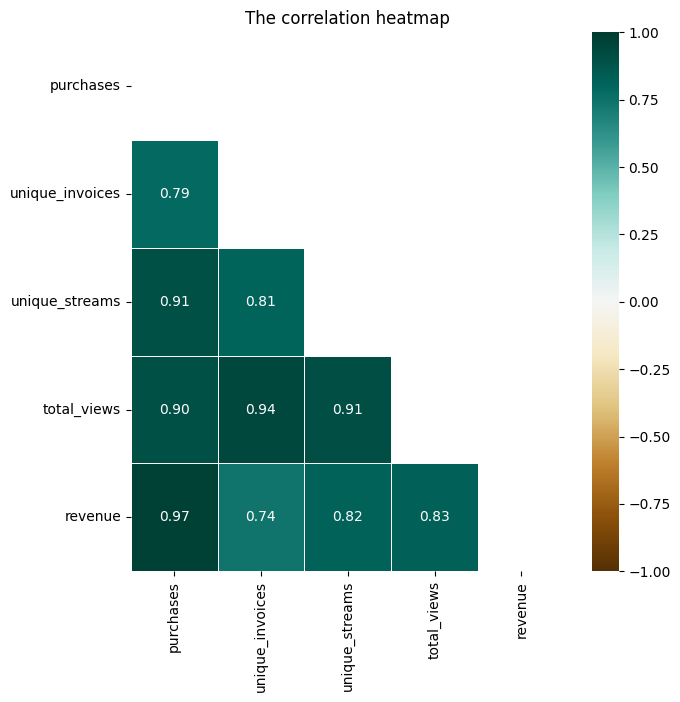

Statisticaly, there is a significant correlation between 'revenue' and 'purchases'.
Statisticaly, there is a significant correlation between 'revenue' and 'unique_invoices'.
Statisticaly, there is a significant correlation between 'revenue' and 'unique_streams'.
Statisticaly, there is a significant correlation between 'revenue' and 'total_views'.


In [21]:
# Plot the correlation matrix and its statistical significances

correlation_matrix_and_stat_significance(user_engagement_df, 'revenue', 'spearman')


The data reveals a significant relationship among user engagement variables (purchases, streams, and views) highlighting their direct impact on revenue. 

Notably, the strong correlations between unique streams, total views, and revenue indicate that enhancing customer engagement through increased content views and unique streams is crucial for driving revenue growth.

Finally, we can easily observe a potentiel multicollinearity among the user engagement variables

To provide insights into how much of the variance in revenue can be explained by user engagement, we conduct a regression analysis to model the relationship between the user engagement variables and monthly revenue, controlling for other factors such as country.

To begin with, and to mitigate the multicollinearity among the user engagement variables, we will employ Ridge regression alongside feature selection techniques.

In [22]:
# Define the features and target variable
y = user_engagement_df['revenue']
X = user_engagement_df.drop(columns=['year-month','revenue']) 

# Initialize variables to track the best model
best_mse = float('inf')
best_features = None

# Iterate through all combinations of predictors
features = X.columns
num_features = len(features)

for i in range(1, num_features + 1):
    for combination in itertools.combinations(features, i):
        # Train the model with the selected features
        model = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)
        model.fit(X[list(combination)], y)  # Fit the model on the entire dataset
        
        # Make predictions and calculate MSE
        predictions = model.predict(X[list(combination)])
        mse = mean_squared_error(y, predictions)  # Calculate MSE on the same dataset

        # Check if this is the best model
        if mse < best_mse:
            best_mse = mse
            best_features = combination

# Output the best model results
print("\nBest features:", best_features)
print("Best Mean Squared Error:", best_mse)



Best features: ('purchases', 'unique_invoices', 'total_views')
Best Mean Squared Error: 4435748.981878823


The Ridge regression identified purchases, unique invoices, and total views as the optimal features. We will use these, along with a constant term, to build a simple linear regression model, aiming to ensure clarity and interpretability in our analysis.

In [23]:
# Define the features and target variable
X = user_engagement_df[list(best_features)]
y = user_engagement_df['revenue']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1253.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           3.87e-20
Time:                        23:49:23   Log-Likelihood:                -190.04
No. Observations:                  21   AIC:                             388.1
Df Residuals:                      17   BIC:                             392.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             785.3284   1786.497     

The OLS regression model demonstrates a strong fit with an R-squared of 0.995, indicating that 99.5% of the variance in revenue is explained by the independent variables. 

Significant predictors include purchases (p < 0.001), which positively influences revenue, and total views (p < 0.001), which negatively affects revenue, suggesting that increased views might not translate to higher revenue in this context. 

## IV - Seasonal Revenue Trend Analysis

Let's delve into the seasonal revenue trends, which hopefuly will reveal that certain days yield significantly higher revenue than others. 

This analysis will focus on the fields of days and price. To evaluate the seasonal patterns and identify significant revenue variations across days, we will employ statistical methods such as Seasonal Decomposition of Time Series (STL) or Autocorrelation or Partial Autocorrelation (ACF/PACF). 

### 1 - Date invistigation 

To begin with, let's understand the time coverage and potential gaps in the data.

In [24]:
## Dates Span and Missing Observations

nunique_dates = loaded_df.date.nunique()

max_date = loaded_df.date.max()
min_date = loaded_df.date.min()

span_dates = (max_date -  min_date).days + 1

missing_observations = span_dates - nunique_dates

print("\nDates Summary\n{}".format("-"*23))

print(f'\nAs highlighted above, there are {nunique_dates} unique date.')

print(f'\nThe dates span a range of {span_dates} days')

print(f'\nThe dates start the {min_date} and end the {max_date}')

print(f"\nThere are {missing_observations} missing date observations.\n")


Dates Summary
-----------------------

As highlighted above, there are 495 unique date.

The dates span a range of 611 days

The dates start the 2017-11-28 00:00:00 and end the 2019-07-31 00:00:00

There are 116 missing date observations.



### 2 - Revenue Time Series Visualization

Next, we’ll visualize the Daily Revenue Over Time to identify trends, seasonal patterns, and fluctuations in revenue. This plot will help us assess the consistency of revenue generation and detect any anomalies or significant peaks and troughs across the observed period.








In [25]:
ts_df = time_series_df(loaded_df, country=None)
ts_df = ts_df[['date','revenue']]
ts_df['date'] = pd.to_datetime(ts_df['date'])
# Set 'date' as datetime and index
ts_df.set_index('date', inplace=True)
ts_df.head()

revenue
date               
2017-11-28  8291.52
2017-11-29  8114.47
2017-11-30  7475.71
2017-12-01  6198.74
2017-12-02  1127.65

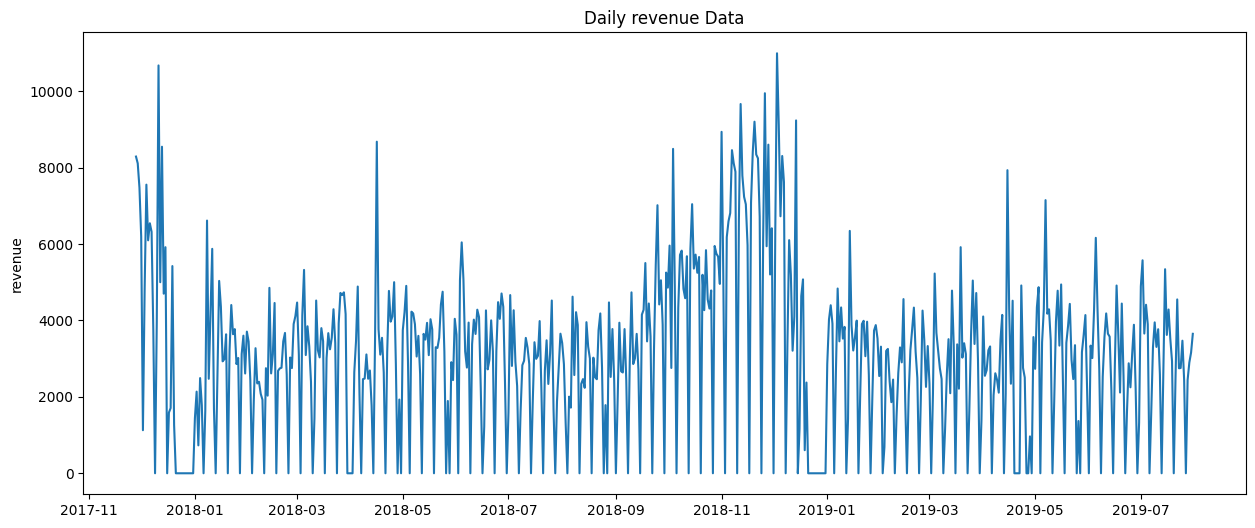

In [26]:
plt.figure(figsize=(15,6))
plt.plot(ts_df.index,ts_df['revenue'].dropna())
plt.ylabel('revenue')
plt.title('Daily revenue Data');

### 3 - Stationarity Check and Smoothing Revenue Trends

In [27]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries, window):
    dftest = ts.adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,6))
    if window == 7 : 
        title_format = 'weekly'
    elif window == 30 : 
        title_format = 'monthly'
    elif window == 365 : 
        title_format = 'yearly'
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label=f'{title_format} Rolling Mean')
    std = plt.plot(rolstd, color='black', label = f'{title_format} Rolling Std')
    plt.legend(loc='best')
    plt.title(f'{title_format} Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic           -4.533202
p-value                   0.000171
Lags Used                16.000000
Observations Used       594.000000
Critical Value (1%)      -3.441407
Critical Value (5%)      -2.866418
Critical Value (10%)     -2.569368
dtype: float64


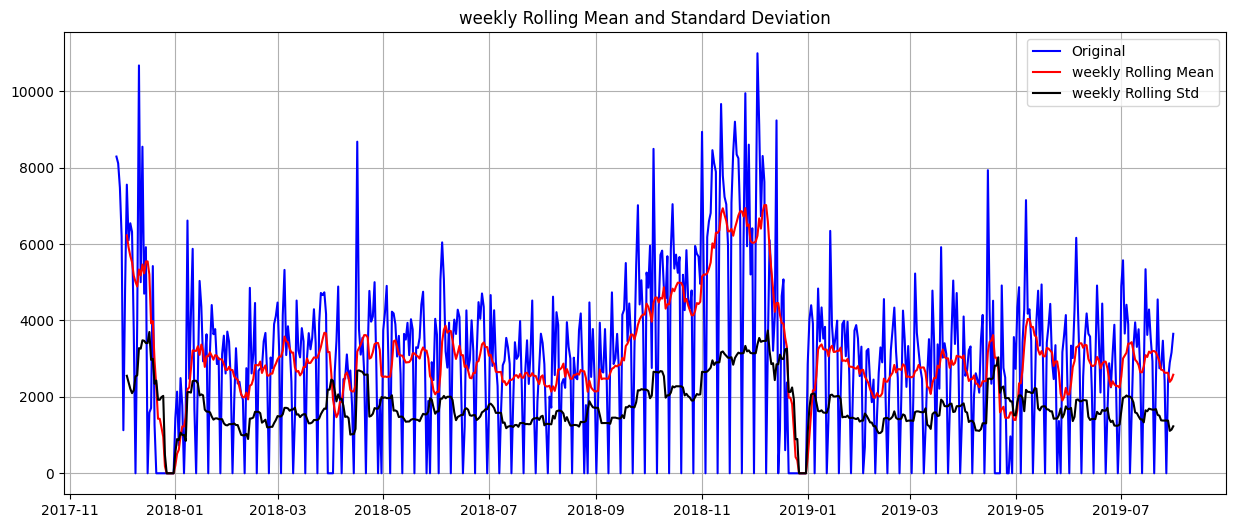

In [28]:
dftest(ts_df['revenue'].dropna(), 7)

Test Statistic           -4.533202
p-value                   0.000171
Lags Used                16.000000
Observations Used       594.000000
Critical Value (1%)      -3.441407
Critical Value (5%)      -2.866418
Critical Value (10%)     -2.569368
dtype: float64


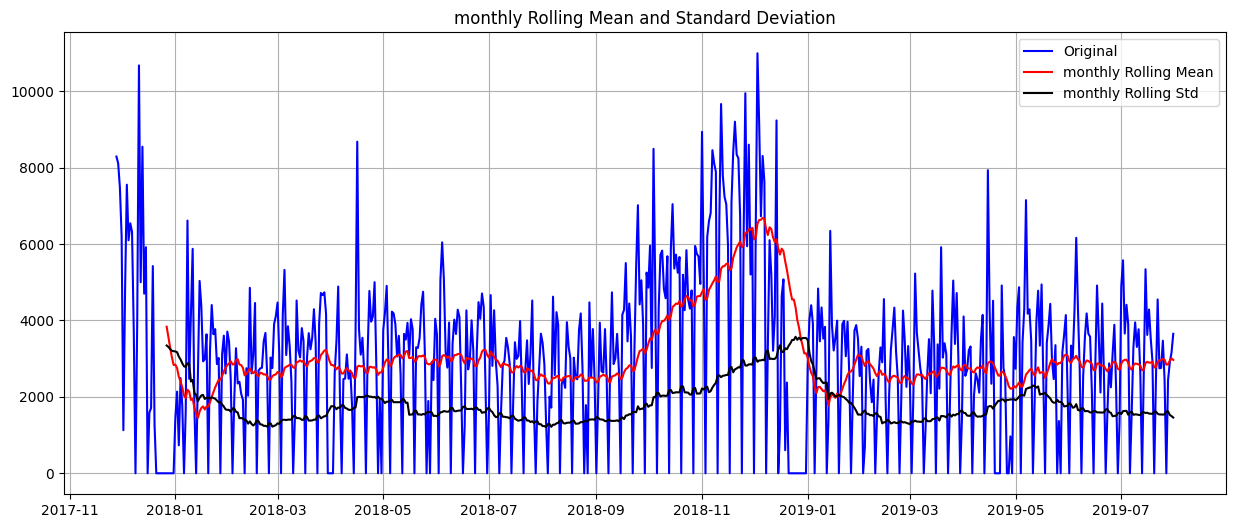

In [29]:
dftest(ts_df['revenue'].dropna(), 30)

Test Statistic           -4.533202
p-value                   0.000171
Lags Used                16.000000
Observations Used       594.000000
Critical Value (1%)      -3.441407
Critical Value (5%)      -2.866418
Critical Value (10%)     -2.569368
dtype: float64


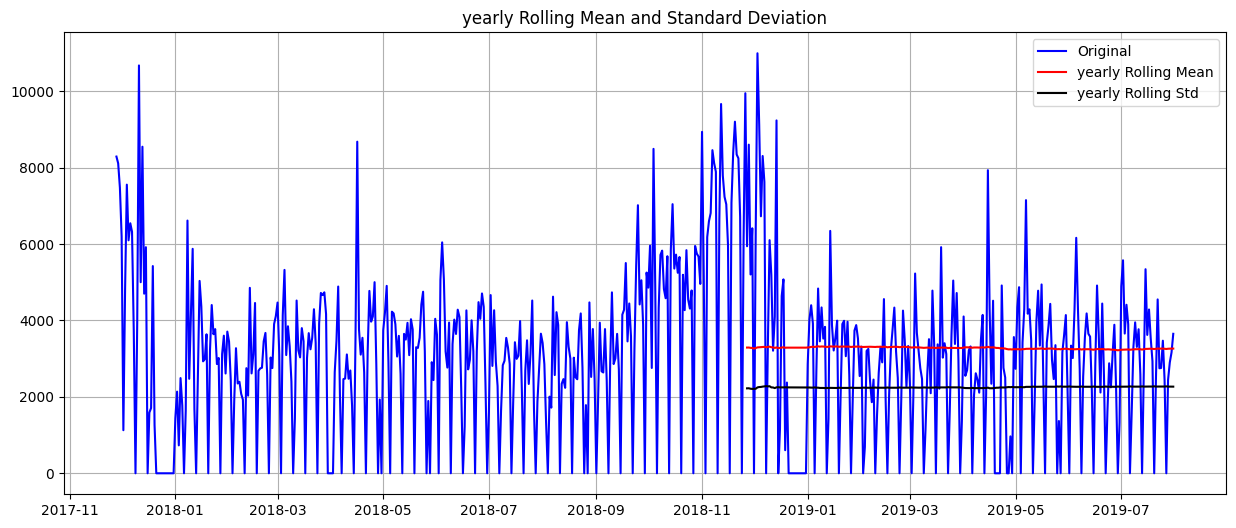

In [30]:
dftest(ts_df['revenue'].dropna(), 365)

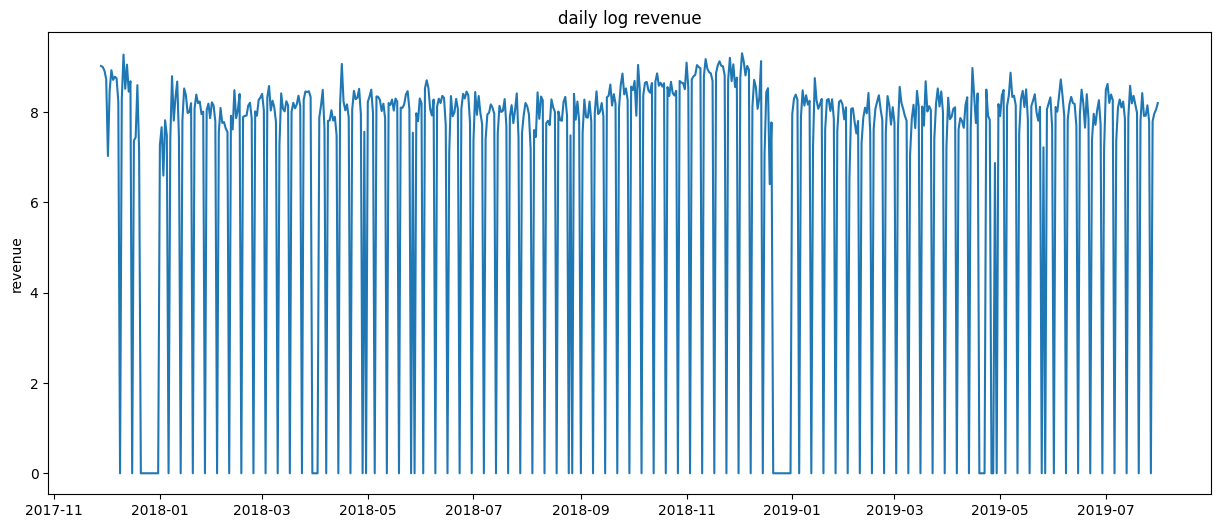

In [31]:
# insuring stationarity :
#given the difference in variance we should probably take log of data 
ts_df['log_revenue'] = np.log1p(ts_df['revenue'])

# plot log data
plt.figure(figsize=(15,6))
plt.plot(ts_df.index,ts_df['log_revenue'])
plt.ylabel('revenue')
plt.title('daily log revenue');

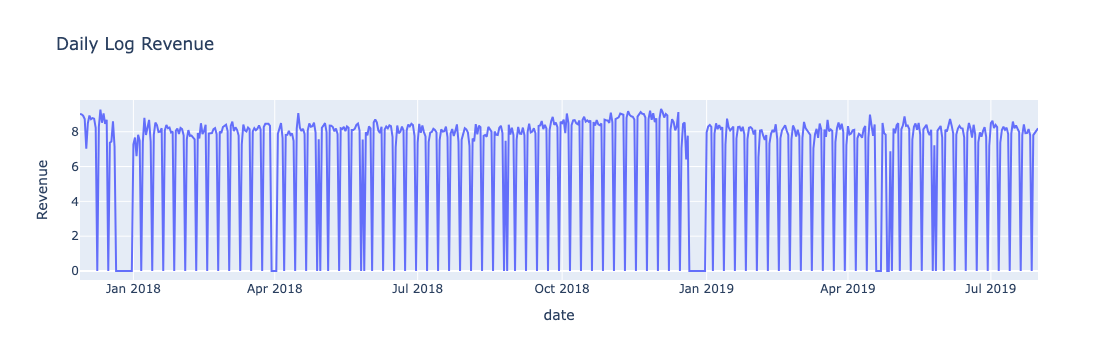

In [32]:
import plotly.express as px

# Créer la figure avec Plotly Express
fig = px.line(ts_df, x=ts_df.index, y='log_revenue', 
              labels={'log_revenue': 'Revenue'}, 
              title='Daily Log Revenue')

# Afficher le graphique
fig.show()


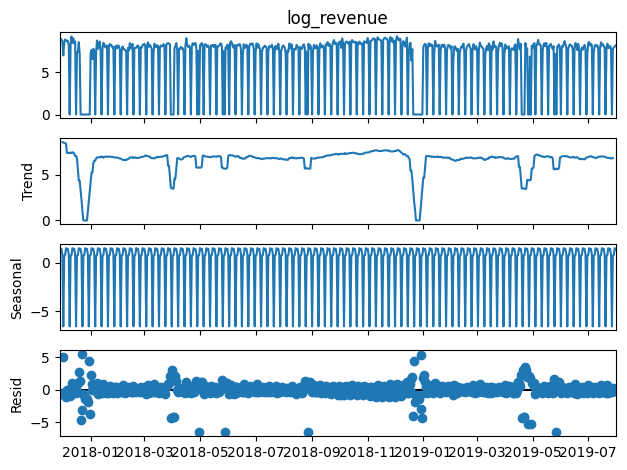

In [33]:
# plot decomposition with frequency 7
# Seems to do decent job of capturing seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(ts_df.log_revenue , period=7).plot();

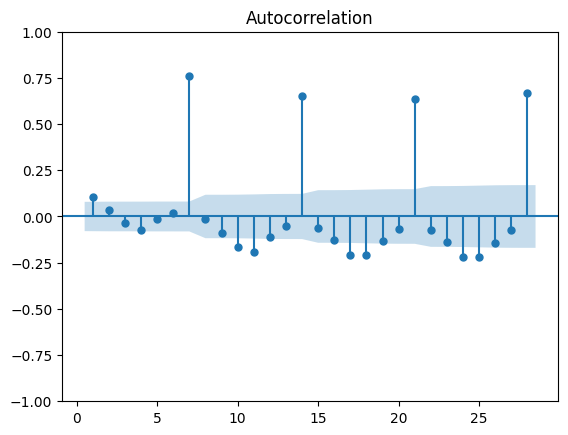

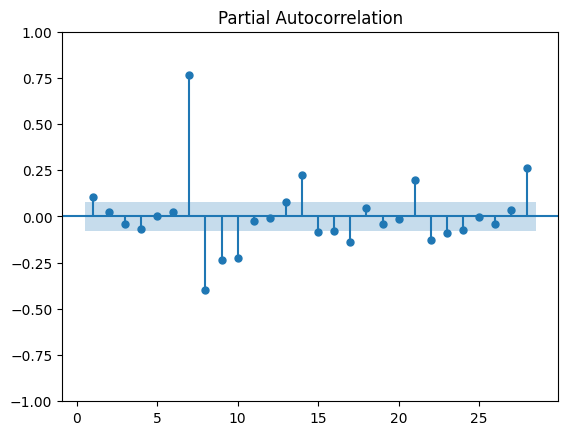

In [34]:

sm.tsa.graphics.plot_acf( ts_df.log_revenue , zero = False)
sm.tsa.graphics.plot_pacf(ts_df.log_revenue , zero = False);

In [35]:
# differencing the seasonality discovered in the plot above 
ts_df['lag_07'] = ts_df.log_revenue.shift(7)
ts_df['seasonal_diff'] = ts_df.log_revenue - ts_df['lag_07']

Test Statistic         -7.667387e+00
p-value                 1.627483e-11
Lags Used               1.900000e+01
Observations Used       5.840000e+02
Critical Value (1%)    -3.441597e+00
Critical Value (5%)    -2.866502e+00
Critical Value (10%)   -2.569412e+00
dtype: float64


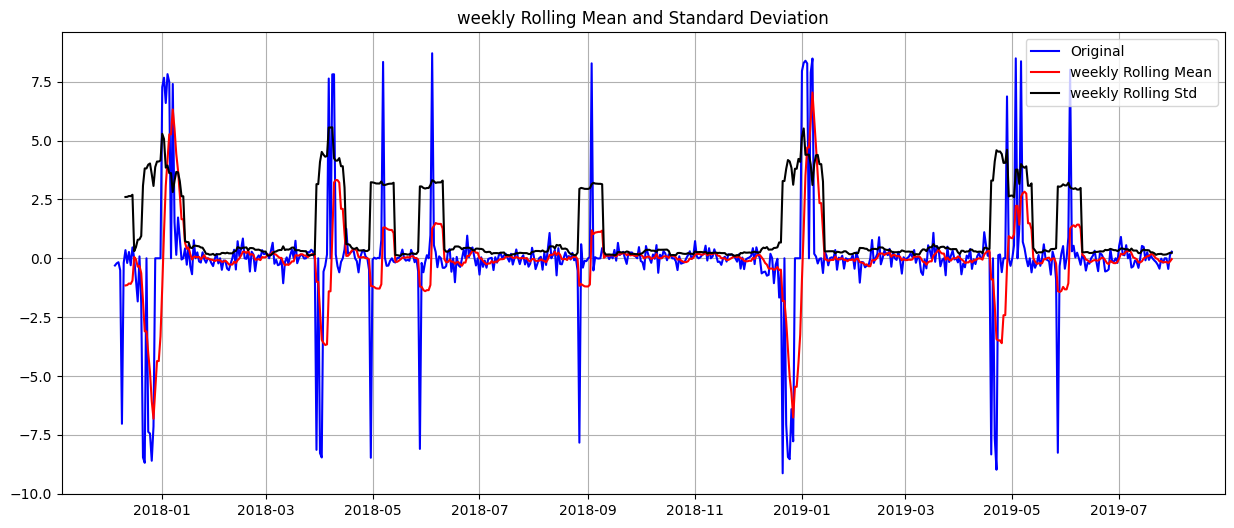

In [36]:
# testing for the stationarity of the seasonal_diff data
dftest(ts_df['seasonal_diff'].dropna(), 7)

Test Statistic         -7.667387e+00
p-value                 1.627483e-11
Lags Used               1.900000e+01
Observations Used       5.840000e+02
Critical Value (1%)    -3.441597e+00
Critical Value (5%)    -2.866502e+00
Critical Value (10%)   -2.569412e+00
dtype: float64


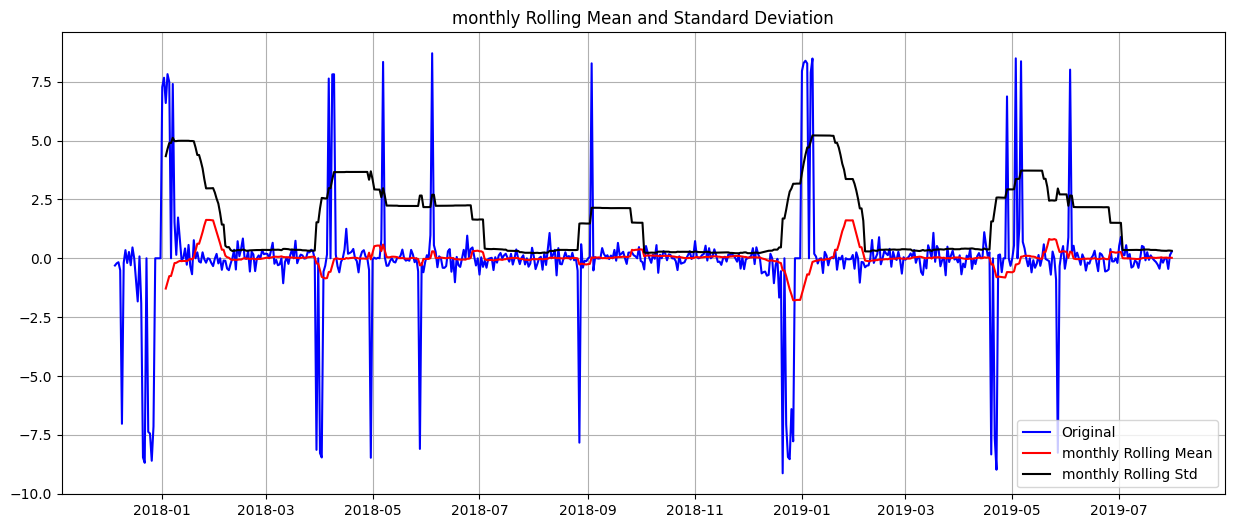

In [37]:
dftest(ts_df['seasonal_diff'].dropna(), 30)

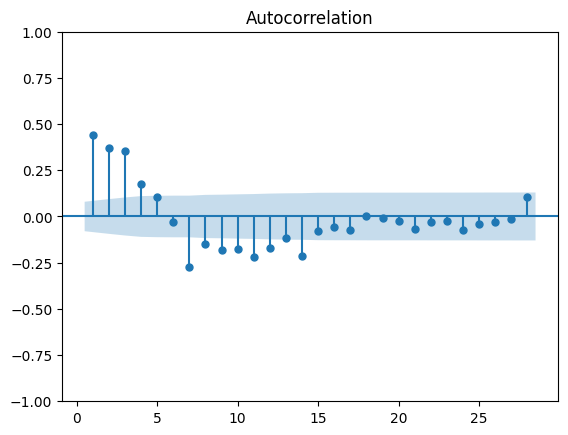

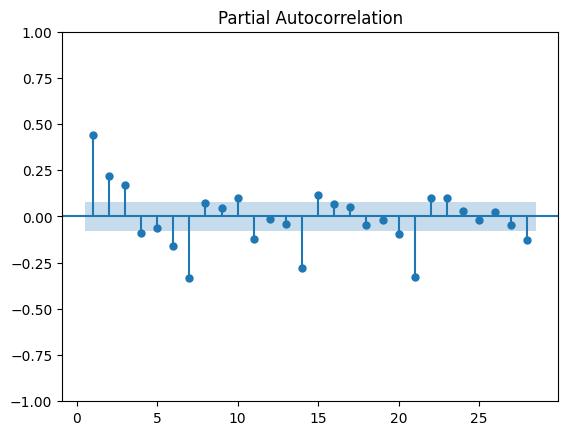

In [38]:
#plot the acf and pacf of the seasonal_diff data to guess the orders p and q
sm.tsa.graphics.plot_acf(ts_df['seasonal_diff'].dropna() ,zero=False)
sm.tsa.graphics.plot_pacf(ts_df['seasonal_diff'].dropna(),zero=False);

In [39]:
# modeling using the most basic model 
sar_basic = sm.tsa.statespace.SARIMAX(ts_df.log_revenue, 
                                order=(0,0,0),    # d=0 because data was not differentiate 
                                seasonal_order=(0,1,0,7),  # 0,1,0,7  the one here D=1 because we have differiate the ts_df.log_revenue 
                                trend='c').fit();

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18662D+00    |proj g|=  2.02611D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   2.026D-06   2.187D+00
  F =   2.1866213018398999     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


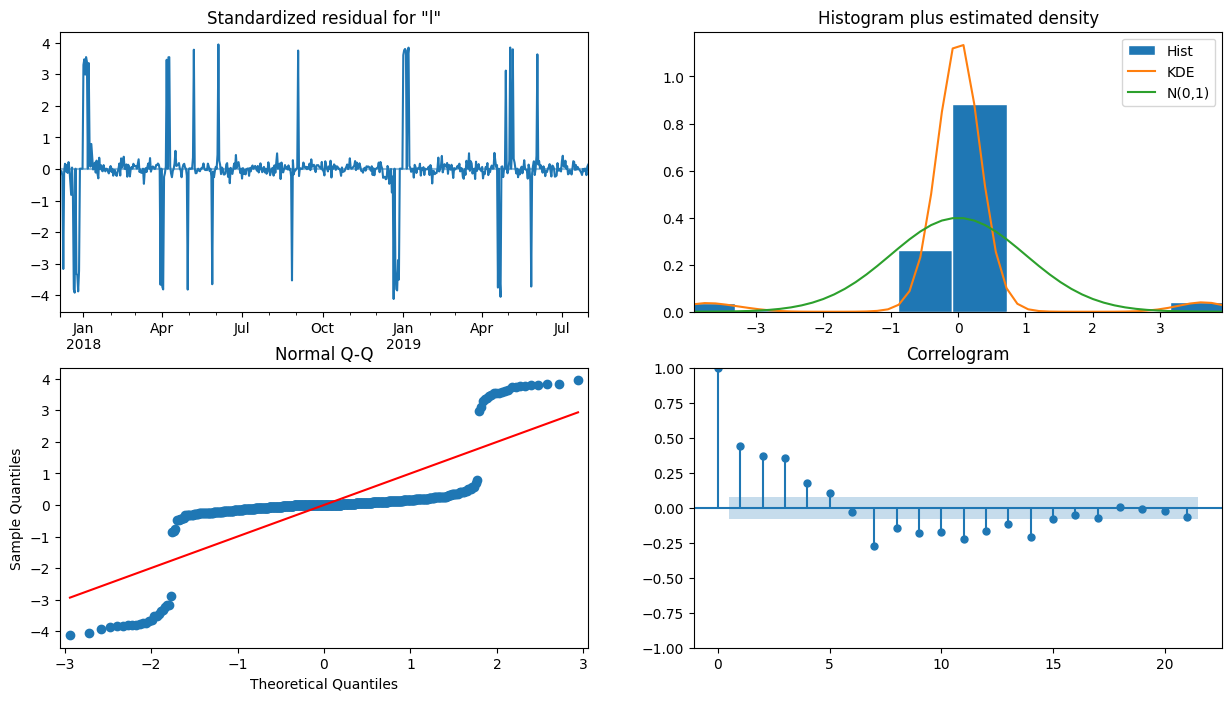

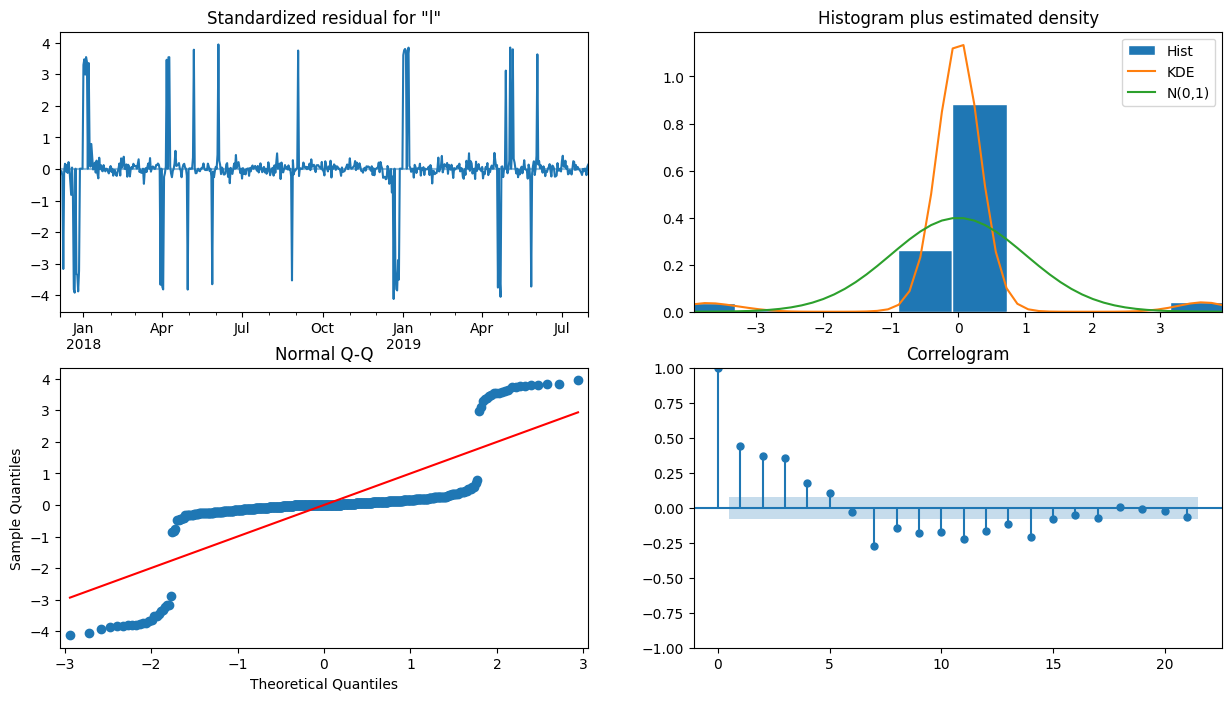

In [42]:
# plot the pacf to test normality of residuals 
# and
sar_basic.plot_diagnostics(figsize = (15,8), lags = 21)

In [46]:
# performing an auto modeling to compare with our guess on the orders and seasonnal orders
auto_model = pm.auto_arima(ts_df.log_revenue, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print('order: ',auto_model.order)
print('seasonal order: ',auto_model.seasonal_order)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2676.051, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2489.355, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2674.101, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=2548.418, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2417.015, Time=0.43 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.51 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=2571.211, Time=0.50 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=2374.343, Time=0.80 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=2449.232, Time=0.25 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=3.39 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=2345.182, Time=0.92 s

In [47]:
# replacing those orders and seasonnal orders in our basic model 
sar_best = sm.tsa.statespace.SARIMAX(ts_df.log_revenue, 
                                     order=(3, 0, 0),
                                     seasonal_order=(2, 1, 0, 7), 
                                     trend='c').fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93476D+00    |proj g|=  1.24550D-01


 This problem is unconstrained.



At iterate    5    f=  1.90769D+00    |proj g|=  1.92530D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      9     11      1     0     0   1.182D-05   1.908D+00
  F =   1.9076777990068166     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [55]:
# defining cross validation 
# When deciding on a model, often what truly matters is how well we would be able to produce out of sample predictions.
# Here we create a function that looks at multiple out of sample predictions to see which model had lowest out of sample error

def cross_validate( series , horizon , start , step_size , order , seasonal_order , trend=None ):
    '''
    Function to determine in and out of sample testing of arima model    
    
    arguments
    ---------
    series (seris): time series input
    horizon (int): how far in advance forecast is needed
    start (int): starting location in series
    step_size (int): how often to recalculate forecast
    order (tuple): (p,d,q) order of the model
    seasonal_order (tuple): (P,D,Q,s) seasonal order of model
    
    Returns
    -------
    DataFrame: gives fcst and actuals with date of prediction
    '''
    fcst = []
    actual = []
    date = []
    for i in range( start , len(series)-horizon , step_size ):
        model = sm.tsa.statespace.SARIMAX(  series[:i+1] ,                    # only using data through to and including start 
                                            order          = order, 
                                            seasonal_order = seasonal_order, 
                                            trend          = trend).fit()
        fcst.append(model.forecast(steps = horizon)[-1])                       # forecasting horizon steps into the future
        actual.append(series[i+horizon])                                       # comparing that to actual value at that point
        date.append(series.index[i+horizon])                                   # saving date of that value
    return pd.DataFrame({'fcst':fcst,'actual':actual},index=date)



In [64]:
# performing cross validation 

serie = ts_df.log_revenue
horizon = 1
step_size = 1
exclude_days = 30

total_length = len( serie )
train_length = total_length - exclude_days
start = int( train_length * 0.9 )

order = auto_model.order
seasonal_order = auto_model.seasonal_order

log_cv1 = cross_validate(serie, horizon, start, step_size,
                         order = order,
                         seasonal_order = seasonal_order
                        )


# Afficher les résultats
print(log_cv1)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95718D+00    |proj g|=  1.26855D-01

At iterate    5    f=  1.92608D+00    |proj g|=  2.25733D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   6.904D-06   1.926D+00
  F =   1.9260699363428955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.92542D+00    |proj g|=  2.61048D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   9.242D-06   1.925D+00
  F =   1.9254004794073760     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96092D+00    |proj g|=  1.42022D-01

At iterate    5    f=  1.92760D+00    |proj g|=  3.79560D-03

At iterate   10    f=  1.92756D+00    |proj g|=  3.40106D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   3.401D-06   1.928D+00
  F =   1.9275609200603108     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  1.92718D+00    |proj g|=  2.91422D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   2.914D-06   1.927D+00
  F =   1.9271835197840586     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96017D+00    |proj g|=  1.39607D-01


 This problem is unconstrained.



At iterate    5    f=  1.92677D+00    |proj g|=  3.88127D-03

At iterate   10    f=  1.92673D+00    |proj g|=  2.51958D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   2.520D-06   1.927D+00
  F =   1.9267344230542376     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95996D+00    |proj g|=  1.38316D-01

At iterate    5    f=  1.92645D+00    |proj g|=  3.62600D-03

At iterate   10    f=  1.92642D+00    |proj g|=  4.23650D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   4.237D-06   1.926D+00
  F =   1.9264166722917881     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96117D+00    |proj g|=  1.34353D-01

At iterate    5    f=  1.93045D+00    |proj g|=  3.59610D-03

At iterate   10    f=  1.93042D+00    |proj g|=  2.69336D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   2.693D-06   1.930D+00
  F =   1.9304229970915667     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96126D+00    |proj g|=  1.34582D-01

At iterate    5    f=  1.93065D+00    |proj g|=  3.41600D-03

At iterate   10    f=  1.93062D+00    |proj g|=  2.01310D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   2.013D-06   1.931D+00
  F =   1.9306176166579001     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96221D+00    |proj g|=  1.38423D-01

At iterate    5    f=  1.93186D+00    |proj g|=  3.94653D-03

At iterate   10    f=  1.93182D+00    |proj g|=  3.37872D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   3.379D-06   1.932D+00
  F =   1.9318190799016044     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96115D+00    |proj g|=  1.35813D-01

At iterate    5    f=  1.93199D+00    |proj g|=  3.64995D-03

At iterate   10    f=  1.93196D+00    |proj g|=  2.82991D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   2.830D-06   1.932D+00
  F =   1.9319576437656405     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96078D+00    |proj g|=  1.34401D-01

At iterate    5    f=  1.93249D+00    |proj g|=  3.37256D-03

At iterate   10    f=  1.93246D+00    |proj g|=  2.24236D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   2.242D-06   1.932D+00
  F =   1.9324623152957829     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96003D+00    |proj g|=  1.34423D-01

At iterate    5    f=  1.93182D+00    |proj g|=  3.32275D-03

At iterate   10    f=  1.93179D+00    |proj g|=  2.10834D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   2.108D-06   1.932D+00
  F =   1.9317895980147948     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95918D+00    |proj g|=  1.34230D-01

At iterate    5    f=  1.93093D+00    |proj g|=  3.32012D-03

At iterate   10    f=  1.93091D+00    |proj g|=  2.18139D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   2.181D-06   1.931D+00
  F =   1.9309068927273050     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95938D+00    |proj g|=  1.32220D-01

At iterate    5    f=  1.93148D+00    |proj g|=  3.09210D-03

At iterate   10    f=  1.93146D+00    |proj g|=  1.53686D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   1.537D-06   1.931D+00
  F =   1.9314613077615153     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.93093D+00    |proj g|=  3.03045D-03

At iterate   10    f=  1.93091D+00    |proj g|=  1.45917D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   1.459D-06   1.931D+00
  F =   1.9309105968219964     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95792D+00    |proj g|=  1.32088D-01

At iterate    5    f=  1.93027D+00    |proj g|=  3.02593D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95734D+00    |proj g|=  1.32213D-01

At iterate    5    f=  1.92991D+00    |proj g|=  2.95095D-03


 This problem is unconstrained.



At iterate   10    f=  1.92989D+00    |proj g|=  1.38896D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   1.389D-06   1.930D+00
  F =   1.9298921663909367     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95649D+00    |proj g|=  1.32243D-01


 This problem is unconstrained.



At iterate    5    f=  1.92905D+00    |proj g|=  2.93597D-03

At iterate   10    f=  1.92903D+00    |proj g|=  1.38225D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   1.382D-06   1.929D+00
  F =   1.9290256800047123     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95562D+00    |proj g|=  1.32244D-01

At iterate    5    f=  1.92817D+00    |proj g|=  2.91935D-03

At iterate   10    f=  1.92815D+00    |proj g|=  1.37386D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   1.374D-06   1.928D+00
  F =   1.9281533225748173     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.92744D+00    |proj g|=  2.90413D-03

At iterate   10    f=  1.92742D+00    |proj g|=  1.28397D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   1.284D-06   1.927D+00
  F =   1.9274222875001190     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97265D+00    |proj g|=  1.27014D-01

At iterate    5    f=  1.94677D+00    |proj g|=  2.56592D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97321D+00    |proj g|=  1.27510D-01

At iterate    5    f=  1.94718D+00    |proj g|=  2.48589D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.308D-05   1.947D+00
  F =   1.9471652843493195     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97337D+00    |proj g|=  1.26693D-01

At iterate    5    f=  1.94760D+00    |proj g|=  2.65394D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.507D-05   1.948D+00
  F =   1.9475884445907030     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97364D+00    |proj g|=  1.25355D-01

At iterate    5    f=  1.94826D+00    |proj g|=  2.25925D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.560D-05   1.948D+00
  F =   1.9482524576396620     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97197D+00    |proj g|=  1.25452D-01

At iterate    5    f=  1.94657D+00    |proj g|=  2.23175D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.496D-05   1.947D+00
  F =   1.9465577689973901     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97125D+00    |proj g|=  1.25483D-01

At iterate    5    f=  1.94584D+00    |proj g|=  2.21946D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.454D-05   1.946D+00
  F =   1.9458291519593054     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.94909D+00    |proj g|=  2.57956D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.141D-05   1.949D+00
  F =   1.9490780448549769     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97722D+00    |proj g|=  1.27550D-01

At iterate    5    f=  1.94860D+00    |proj g|=  2.72135D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97653D+00    |proj g|=  1.27525D-01

At iterate    5    f=  1.94776D+00    |proj g|=  2.68616D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   2.003D-05   1.948D+00
  F =   1.9477479506015247     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97618D+00    |proj g|=  1.27268D-01

At iterate    5    f=  1.94720D+00    |proj g|=  2.52188D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.013D-05   1.947D+00
  F =   1.9471828250924448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   9.794D-06   1.946D+00
  F =   1.9463241490266008     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97447D+00    |proj g|=  1.27265D-01


 This problem is unconstrained.



At iterate    5    f=  1.94549D+00    |proj g|=  2.49141D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   9.415D-06   1.945D+00
  F =   1.9454759424955901     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97363D+00    |proj g|=  1.27286D-01

At iterate    5    f=  1.94464D+00    |proj g|=  2.47650D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   9.229D-06   1.945D+00
  F =   1.9446288289350939     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97295D+00    |proj g|=  1.26972D-01

At iterate    5    f=  1.94434D+00    |proj g|=  2.85102D-03

At iterate   10    f=  1.94433D+00    |proj g|=  9.68448D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   9.684D-07   1.944D+00
  F =   1.9443259853241159     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.94352D+00    |proj g|=  2.82251D-03

At iterate   10    f=  1.94351D+00    |proj g|=  9.17111D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   9.171D-07   1.944D+00
  F =   1.9435064540951230     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97128D+00    |proj g|=  1.26633D-01


 This problem is unconstrained.



At iterate    5    f=  1.94272D+00    |proj g|=  2.85011D-03

At iterate   10    f=  1.94270D+00    |proj g|=  1.02236D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   1.022D-06   1.943D+00
  F =   1.9427031744646990     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97043D+00    |proj g|=  1.26645D-01


 This problem is unconstrained.



At iterate    5    f=  1.94189D+00    |proj g|=  2.88219D-03

At iterate   10    f=  1.94187D+00    |proj g|=  1.00771D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   1.008D-06   1.942D+00
  F =   1.9418676762605878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96959D+00    |proj g|=  1.26631D-01

At iterate    5    f=  1.94105D+00    |proj g|=  2.86511D-03

At iterate   10    f=  1.94104D+00    |proj g|=  1.06064D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   1.061D-06   1.941D+00
  F =   1.9410361442359356     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96875D+00    |proj g|=  1.26640D-01

At iterate    5    f=  1.94021D+00    |proj g|=  2.84878D-03

At iterate   10    f=  1.94019D+00    |proj g|=  9.13780D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     12      1     0     0   9.138D-07   1.940D+00
  F =   1.9401920644457198     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.93940D+00    |proj g|=  2.82985D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.263D-05   1.939D+00
  F =   1.9393800751994412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96913D+00    |proj g|=  1.24823D-01


 This problem is unconstrained.



At iterate    5    f=  1.94170D+00    |proj g|=  2.46195D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   9.190D-06   1.942D+00
  F =   1.9416843680351197     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96851D+00    |proj g|=  1.24819D-01


 This problem is unconstrained.



At iterate    5    f=  1.94117D+00    |proj g|=  2.43704D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   9.045D-06   1.941D+00
  F =   1.9411603823384891     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96796D+00    |proj g|=  1.24655D-01


 This problem is unconstrained.



At iterate    5    f=  1.94084D+00    |proj g|=  2.45063D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   9.270D-06   1.941D+00
  F =   1.9408292261313234     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96713D+00    |proj g|=  1.24656D-01


 This problem is unconstrained.



At iterate    5    f=  1.94005D+00    |proj g|=  2.39993D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   8.659D-06   1.940D+00
  F =   1.9400375367962372     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96630D+00    |proj g|=  1.24647D-01


 This problem is unconstrained.



At iterate    5    f=  1.93923D+00    |proj g|=  2.38403D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   8.418D-06   1.939D+00
  F =   1.9392133366078199     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96546D+00    |proj g|=  1.24653D-01


 This problem is unconstrained.



At iterate    5    f=  1.93839D+00    |proj g|=  2.36626D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   8.254D-06   1.938D+00
  F =   1.9383775406487560     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96475D+00    |proj g|=  1.24645D-01


 This problem is unconstrained.



At iterate    5    f=  1.93768D+00    |proj g|=  2.34387D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   7.871D-06   1.938D+00
  F =   1.9376694523023805     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96393D+00    |proj g|=  1.24625D-01

At iterate    5    f=  1.93686D+00    |proj g|=  2.32516D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   7.562D-06   1.937D+00
  F =   1.9368428564256939     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96312D+00    |proj g|=  1.24619D-01


 This problem is unconstrained.



At iterate    5    f=  1.93606D+00    |proj g|=  2.30519D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   7.294D-06   1.936D+00
  F =   1.9360447986925255     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96235D+00    |proj g|=  1.24655D-01


 This problem is unconstrained.



At iterate    5    f=  1.93525D+00    |proj g|=  2.28634D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   6.987D-06   1.935D+00
  F =   1.9352373999971881     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96152D+00    |proj g|=  1.24654D-01


 This problem is unconstrained.



At iterate    5    f=  1.93442D+00    |proj g|=  2.27005D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   6.759D-06   1.934D+00
  F =   1.9344105188904521     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96069D+00    |proj g|=  1.24655D-01


 This problem is unconstrained.



At iterate    5    f=  1.93359D+00    |proj g|=  2.25190D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   6.475D-06   1.934D+00
  F =   1.9335814068801391     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95986D+00    |proj g|=  1.24664D-01


 This problem is unconstrained.



At iterate    5    f=  1.93277D+00    |proj g|=  2.23328D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   6.084D-06   1.933D+00
  F =   1.9327547499181317     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95907D+00    |proj g|=  1.24654D-01


 This problem is unconstrained.



At iterate    5    f=  1.93199D+00    |proj g|=  2.21535D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   5.920D-06   1.932D+00
  F =   1.9319750582408013     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95833D+00    |proj g|=  1.24650D-01


 This problem is unconstrained.



At iterate    5    f=  1.93124D+00    |proj g|=  2.19431D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   5.599D-06   1.931D+00
  F =   1.9312323995180509     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95761D+00    |proj g|=  1.24552D-01


 This problem is unconstrained.



At iterate    5    f=  1.93052D+00    |proj g|=  2.17607D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   5.289D-06   1.931D+00
  F =   1.9305131540660516     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95679D+00    |proj g|=  1.24622D-01


 This problem is unconstrained.



At iterate    5    f=  1.92970D+00    |proj g|=  2.16291D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   5.095D-06   1.930D+00
  F =   1.9296904702885733     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95598D+00    |proj g|=  1.24603D-01


 This problem is unconstrained.



At iterate    5    f=  1.92888D+00    |proj g|=  2.14181D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   4.861D-06   1.929D+00
  F =   1.9288733295881295     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95519D+00    |proj g|=  1.24614D-01


 This problem is unconstrained.



At iterate    5    f=  1.92810D+00    |proj g|=  2.12324D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   4.663D-06   1.928D+00
  F =   1.9280861196914409     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95439D+00    |proj g|=  1.24619D-01


 This problem is unconstrained.



At iterate    5    f=  1.92729D+00    |proj g|=  2.10370D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   4.369D-06   1.927D+00
  F =   1.9272819965840358     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95358D+00    |proj g|=  1.24618D-01


 This problem is unconstrained.



At iterate    5    f=  1.92649D+00    |proj g|=  2.08476D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   4.144D-06   1.926D+00
  F =   1.9264836431747707     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95282D+00    |proj g|=  1.24633D-01


 This problem is unconstrained.



At iterate    5    f=  1.92573D+00    |proj g|=  2.06187D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   3.969D-06   1.926D+00
  F =   1.9257152258833099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95200D+00    |proj g|=  1.24584D-01


 This problem is unconstrained.



At iterate    5    f=  1.92491D+00    |proj g|=  2.04321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   3.744D-06   1.925D+00
  F =   1.9249016721705043     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95120D+00    |proj g|=  1.24614D-01

At iterate    5    f=  1.92411D+00    |proj g|=  2.04002D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95039D+00    |proj g|=  1.24606D-01

At iterate    5    f=  1.92330D+00    |proj g|=  2.03968D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   3.370D-06   1.923D+00
  F =   1.9232923715737609     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94958D+00    |proj g|=  1.24595D-01

At iterate    5    f=  1.92250D+00    |proj g|=  2.03886D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   3.147D-06   1.922D+00
  F =   1.9224873744917990     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94878D+00    |proj g|=  1.24611D-01

At iterate    5    f=  1.92169D+00    |proj g|=  2.03829D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   2.988D-06   1.922D+00
  F =   1.9216784652643082     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94808D+00    |proj g|=  1.24602D-01

At iterate    5    f=  1.92099D+00    |proj g|=  2.03579D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   2.815D-06   1.921D+00
  F =   1.9209814252753472     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94731D+00    |proj g|=  1.24591D-01

At iterate    5    f=  1.92022D+00    |proj g|=  2.03429D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   2.573D-06   1.920D+00
  F =   1.9202096753703859     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94651D+00    |proj g|=  1.24554D-01

At iterate    5    f=  1.91942D+00    |proj g|=  2.03070D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   2.462D-06   1.919D+00
  F =   1.9194145080089613     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94493D+00    |proj g|=  1.24559D-01

At iterate    5    f=  1.91784D+00    |proj g|=  2.02178D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   2.209D-06   1.918D+00
  F =   1.9178329921327384     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94413D+00    |proj g|=  1.24554D-01

At iterate    5    f=  1.91704D+00    |proj g|=  2.01699D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   2.153D-06   1.917D+00
  F =   1.9170326660631742     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.91624D+00    |proj g|=  2.01229D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   2.023D-06   1.916D+00
  F =   1.9162334792400171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94254D+00    |proj g|=  1.24559D-01


 This problem is unconstrained.



At iterate    5    f=  1.91546D+00    |proj g|=  2.00730D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.829D-06   1.915D+00
  F =   1.9154518266925731     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94175D+00    |proj g|=  1.24577D-01


 This problem is unconstrained.



At iterate    5    f=  1.91467D+00    |proj g|=  2.00165D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.831D-06   1.915D+00
  F =   1.9146600483732730     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94099D+00    |proj g|=  1.24518D-01

At iterate    5    f=  1.91394D+00    |proj g|=  1.99267D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.612D-06   1.914D+00
  F =   1.9139293639027046     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94022D+00    |proj g|=  1.24497D-01

At iterate    5    f=  1.91316D+00    |proj g|=  1.98610D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.596D-06   1.913D+00
  F =   1.9131540404770693     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93943D+00    |proj g|=  1.24514D-01

At iterate    5    f=  1.91237D+00    |proj g|=  1.97884D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.564D-06   1.912D+00
  F =   1.9123621938573119     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93864D+00    |proj g|=  1.24511D-01

At iterate    5    f=  1.91158D+00    |proj g|=  1.97070D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.537D-06   1.912D+00
  F =   1.9115703171930836     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93785D+00    |proj g|=  1.24519D-01

At iterate    5    f=  1.91080D+00    |proj g|=  1.96230D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.407D-06   1.911D+00
  F =   1.9107875863017740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93707D+00    |proj g|=  1.24527D-01

At iterate    5    f=  1.91002D+00    |proj g|=  1.95309D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.411D-06   1.910D+00
  F =   1.9100099423374204     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93632D+00    |proj g|=  1.24539D-01

At iterate    5    f=  1.90926D+00    |proj g|=  1.94575D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.332D-06   1.909D+00
  F =   1.9092551739163082     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93554D+00    |proj g|=  1.24556D-01

At iterate    5    f=  1.90848D+00    |proj g|=  1.93714D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   1.402D-06   1.908D+00
  F =   1.9084676095320932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 fcst    actual
2019-05-05   7.263487  8.140272
2019-05-06   5.251978  8.366982
2019-05-07  10.160054  8.875175
2019

In [65]:
# rescaling the data  (inverse log)

log_cv1 = np.expm1(log_cv1)

<Axes: title={'center': 'forecast every 1 day using one day prior data'}>

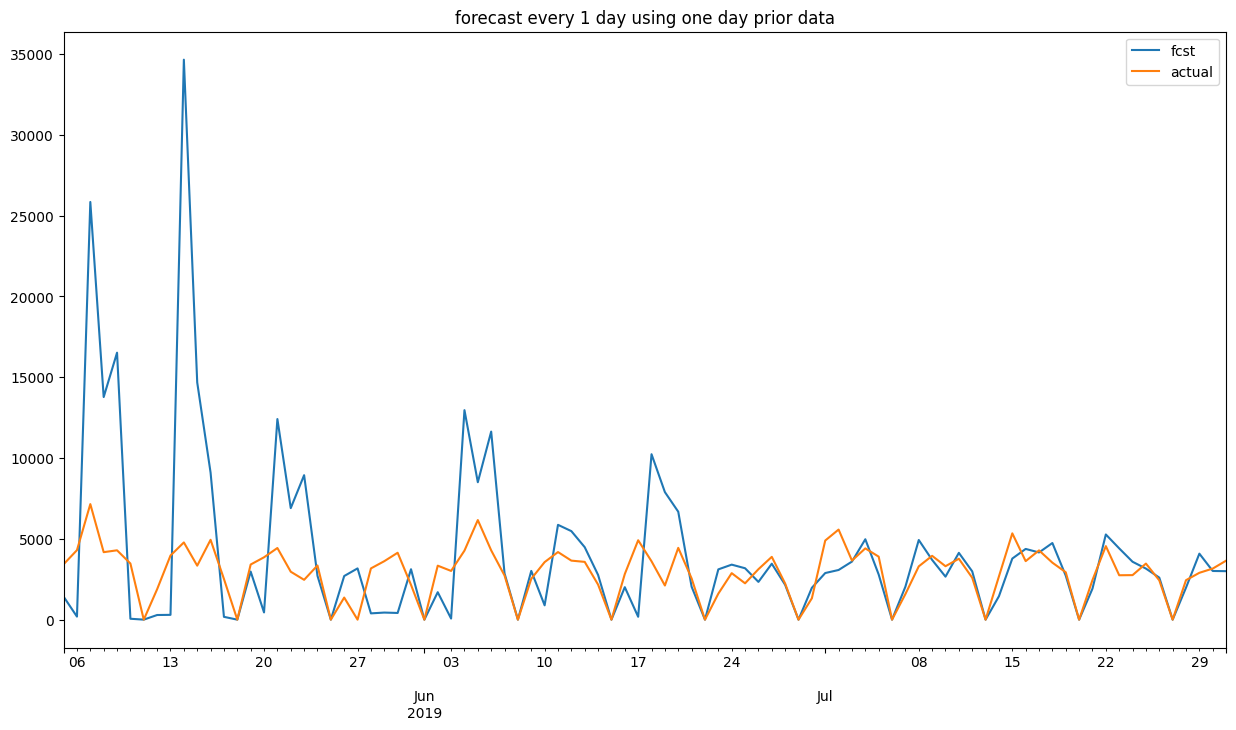

In [66]:
# ploting the forcast

log_cv1.plot(title = f'forecast every {step_size} day using one day prior data', figsize=(15,8))

#### 